In [4]:
%matplotlib inline
import numpy as np
import sklearn.datasets as data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb; sb.set_style( 'darkgrid' ) # use whitegrid if prefer a white background
import pandas as pd

from numpy.random import SeedSequence, default_rng
rng = default_rng( SeedSequence().entropy )

import warnings
warnings.filterwarnings("ignore")

#matplotlib.rcParams.update( { 'font.size': 18 } ) # Use this to setup your preferred font size for plotting

#### 1- First estimate different covariances on the Iris dataset using Gaussian Mixture Models. Plot the different covriance estimation and how well they fit to the data with different number of components and iterations.

+ Covariance is defined as the dispersion of observation pairs in terms how much they differ from a mean value (class specific in case). Notationally, covariance is defined as: mean( $x_i$ - mean($x_i$) ) * mean( $x_j$ - mean($x_j$ ) )
+ Try different initializations for the centroids. By default, K-means clustering is used.
+ Plot the class-specific covariance matrices to check which Gaussian mixture estimator makes sense. 
+ use np.random.norma( mu, sigma, X.shape ) and see how noise affects the estimations

In [5]:
from sklearn.model_selection import train_test_split
from fml5_helper_funcs import make_ellipses
from sklearn.mixture import GaussianMixture

In [6]:
X, Y = data.load_iris( return_X_y = True )

Xtrain, Xtest, ytrain, ytest = train_test_split( X, Y, 
                                                 test_size = 0.3,
                                                 random_state = rng.integers( 4231 ) 
                                               )

+ Spherical covariance: each mixture component has its own (single) covariance
+ Diagonal covariance: each mixture component has the covariance in the diagonal
+ Tied covariance: each mixture component has the same covariance
+ Full covariance: each mixture componen has a general definition of covariance

In [7]:
# Experiment with different number of components in the Gaussian Mixture
# model and different amount of iterations

GMMs = {cov_type: GaussianMixture( n_components    = 3       ,
                                   covariance_type = cov_type, 
                                   max_iter        =20       ,
                                   random_state = rng.integers( 212 )
                                 )
              for cov_type in ['spherical', 'diag', 'tied', 'full']
       }

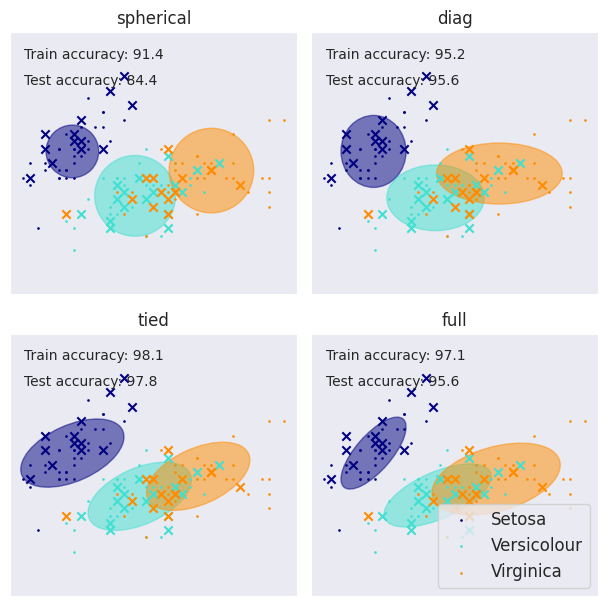

In [8]:
n_classes    = 3
n_estimators = len( GMMs )
ynames = [ 'Setosa', 'Versicolour', 'Virginica']
colors = ['navy', 'turquoise', 'darkorange']

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, ( name, estimator ) in enumerate(GMMs.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([Xtrain[ytrain == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(Xtrain)
    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h, colors )

    for n, color in enumerate(colors):
        data = X[ Y == n ]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=ynames[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = Xtest[ytest == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(Xtrain)
    train_accuracy = np.mean(y_train_pred.ravel() == ytrain.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(Xtest)
    test_accuracy = np.mean(y_test_pred.ravel() == ytest.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [24]:
X0_cov = np.cov( X[ 0:50 ] ) # Example for the Setosa class.

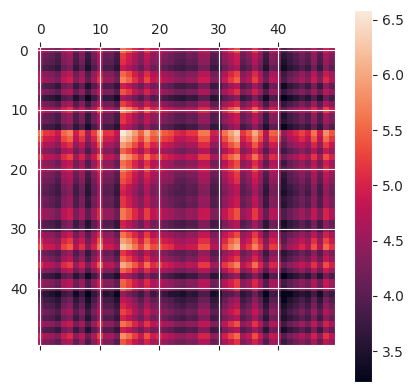

In [30]:
plt.matshow( X0_cov ); plt.colorbar();

#### 2- Perform K-means clustering on the Iris dataset. Try adding Gaussian noise, different $\mu$ and $\sigma$, to the observations and see how the noise and covariance structure of the data affects the computing of the clusters. How does this compare to the Gaussian Mixture Model?

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.5528190123564095
For n_clusters = 4 The average silhouette_score is : 0.49805050499728737
For n_clusters = 5 The average silhouette_score is : 0.48874888709310566
For n_clusters = 6 The average silhouette_score is : 0.36784649847122436


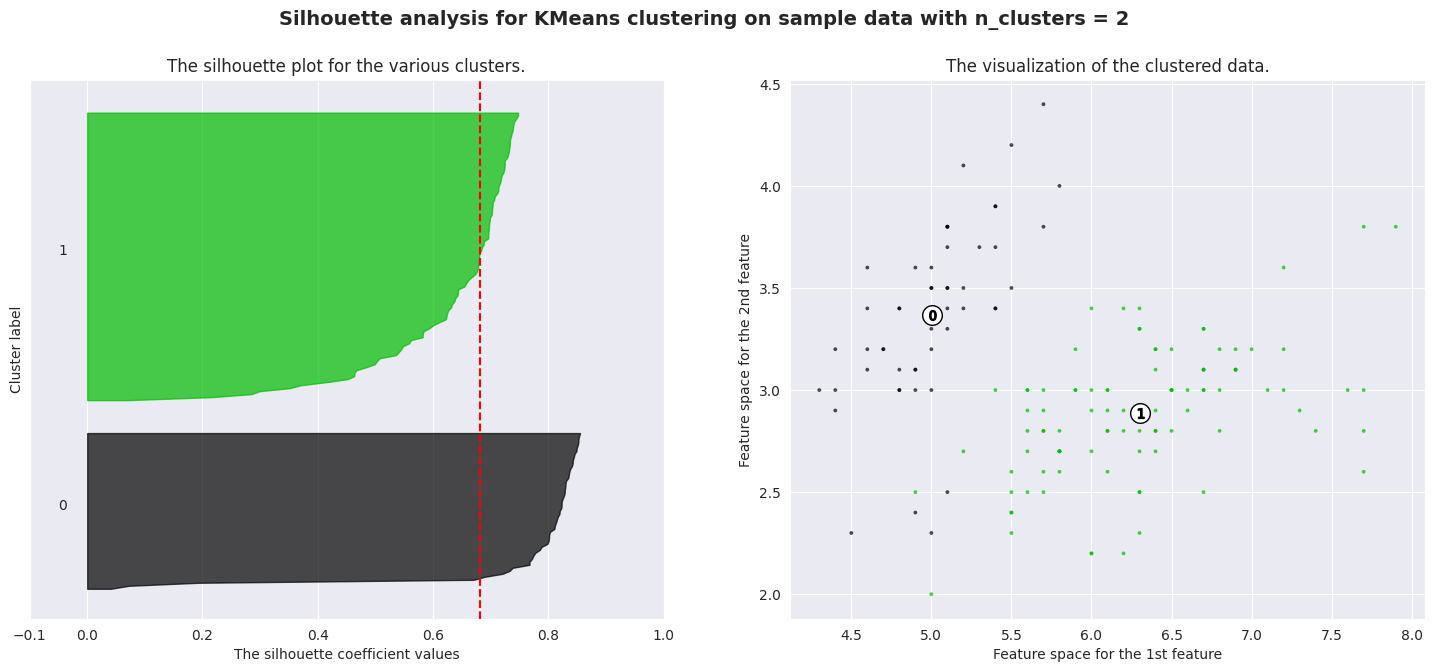

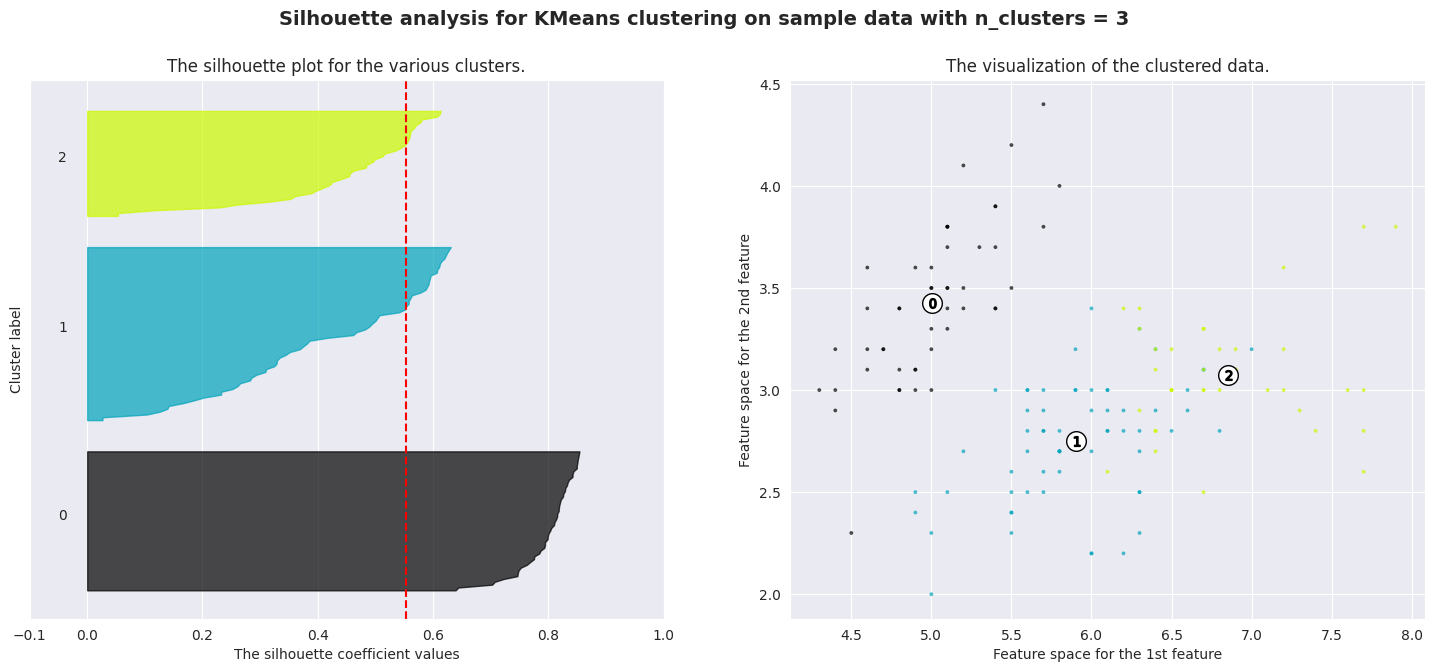

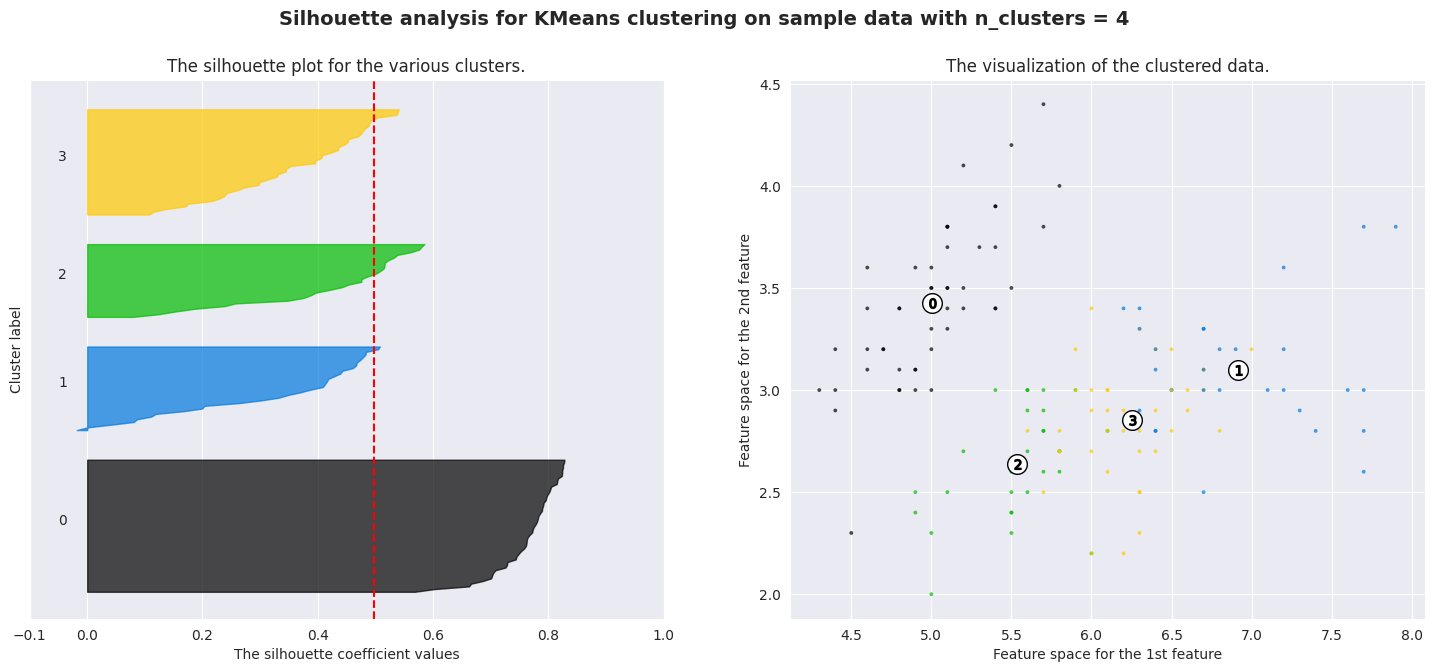

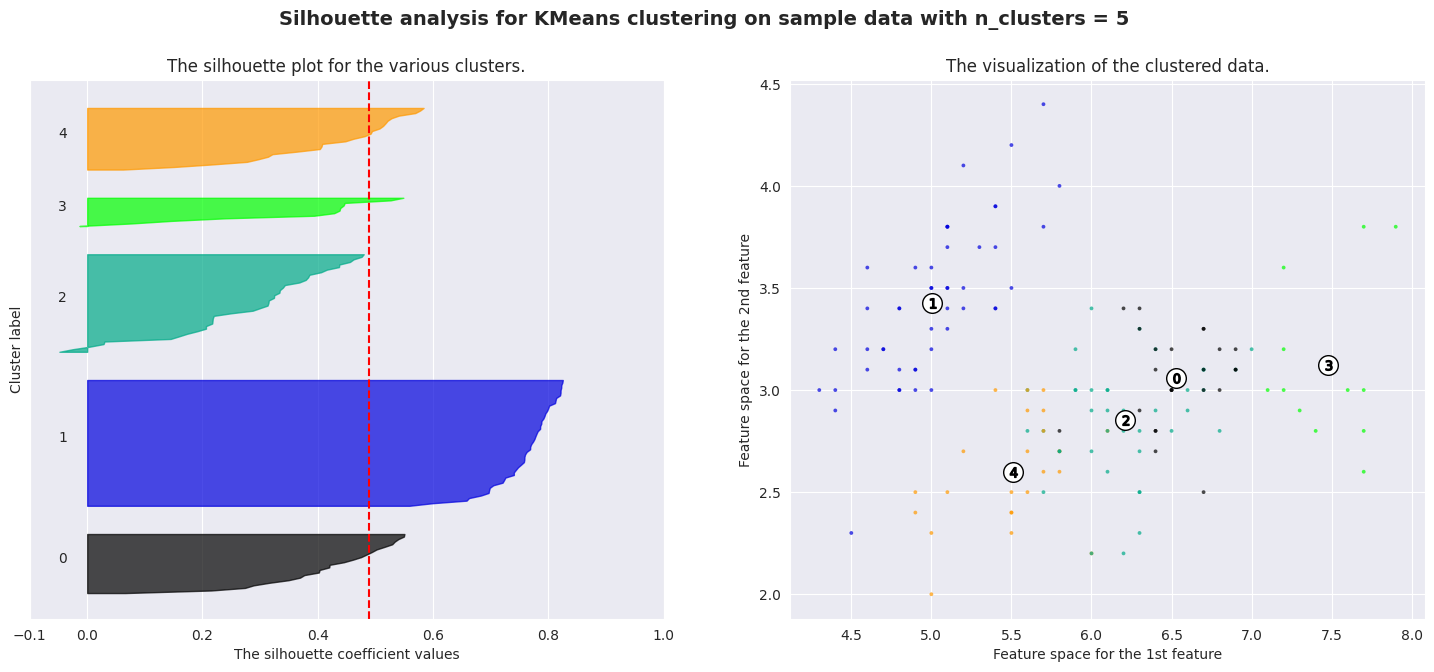

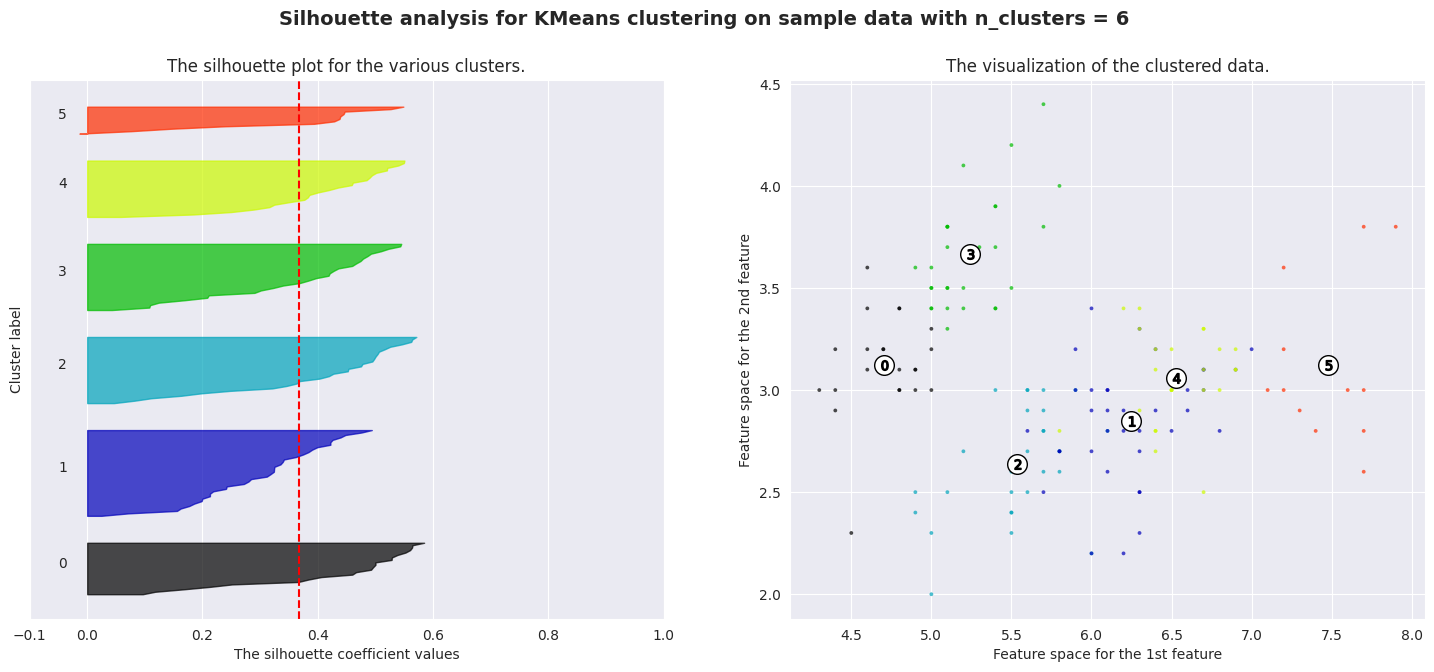

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer      = KMeans(n_clusters=n_clusters, random_state = rng.integers( 2415 ) )
    X              = X + np.random.normal( 0, 1, X.shape )
    cluster_labels = clusterer.fit_predict( X )

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score( X, cluster_labels )
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range( n_clusters ):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed. See how the clusters look from different feature columns
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### 3- Use Nearest neighbors to do a paramteric clustering on the Iris data set.
+ Try out different number of neighbors. Use the same variables as in the two previous exercises so that you can compare the results qualitatively.
+ Shrinkage divides each variable within a class by its variance (deviation from the mean). Experiment with different variance levels to see how groupings change.

None 0.8222222222222222
0.2 0.8222222222222222
0.4 0.8222222222222222
0.9 0.8


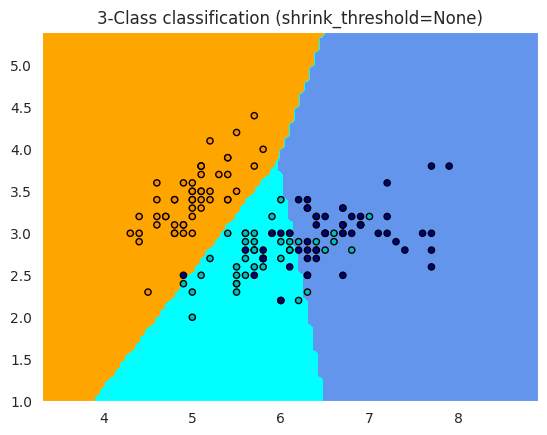

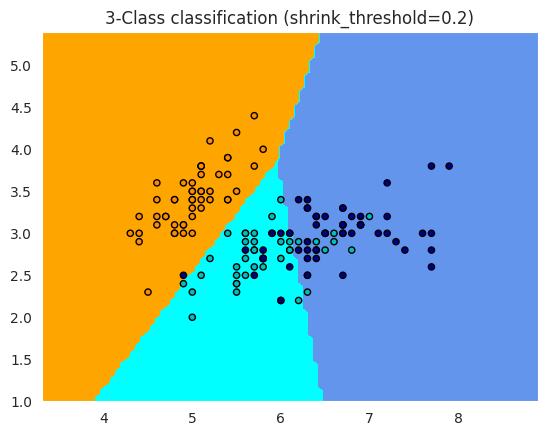

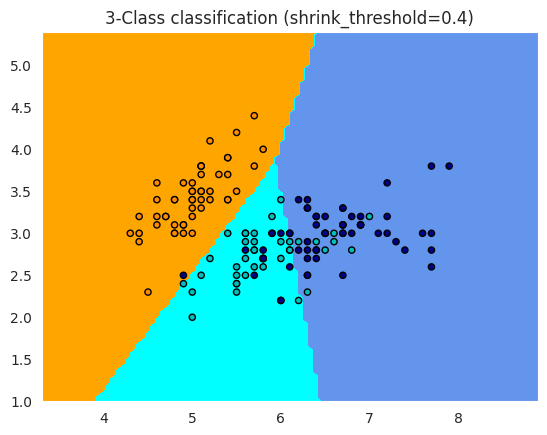

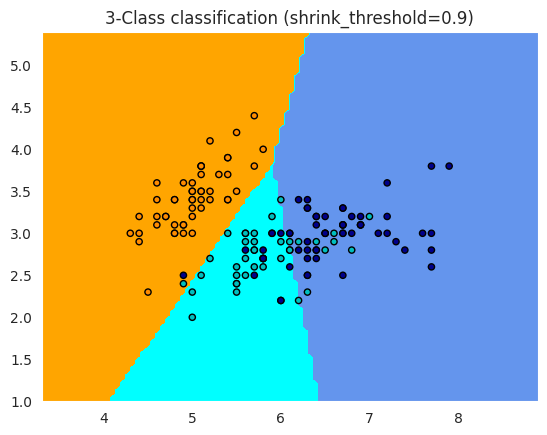

In [33]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

Xtrain, Xtest, ytrain, ytest = train_test_split( X, Y, 
                                                 test_size = 0.3,
                                                 random_state = rng.integers( 4231 ) 
                                               )

#  
for shrinkage in [None, 0.2, 0.4, 0.9]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(Xtest)
    print(shrinkage, np.mean(ytest == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()